In [42]:
from pprint import pprint
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Use the lesson code to have a consistent starting base for learning about NLP models

In [2]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
data = [
    'Python is pretty cool',
    'Python is a nice programming language with nice syntax',
    'I think SQL is cool too',
]

In [4]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data)
bag_of_words

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [5]:
pprint(data)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

['Python is pretty cool',
 'Python is a nice programming language with nice syntax',
 'I think SQL is cool too']


,cool,is,language,nice,pretty,programming,python,sql,syntax,think,too,with
0,1,1,0,0,1,0,1,0,0,0,0,0
1,0,1,1,2,0,1,1,0,1,0,0,1
2,1,1,0,0,0,0,0,1,0,1,1,0


In [6]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(data)

pprint(data)
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

['Python is pretty cool',
 'Python is a nice programming language with nice syntax',
 'I think SQL is cool too']


,cool,is,language,nice,pretty,programming,python,sql,syntax,think,too,with
0,0.480458,0.373119,0.000000,0.000000,0.631745,0.000000,0.480458,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.197673,0.334689,0.669378,0.000000,0.334689,0.254540,0.000000,0.334689,0.000000,0.000000,0.334689
2,0.383770,0.298032,0.000000,0.000000,0.000000,0.000000,0.000000,0.504611,0.000000,0.504611,0.504611,0.000000


In [7]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words = cv.fit_transform(data)

In [8]:
pprint(data)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

['Python is pretty cool',
 'Python is a nice programming language with nice syntax',
 'I think SQL is cool too']


,cool too,is cool,is nice,is pretty,language with,nice programming,nice syntax,pretty cool,programming language,python is,sql is,think sql,with nice
0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,1,1,1,0,1,1,0,0,1
2,1,1,0,0,0,0,0,0,0,0,1,1,0


had an issue with working directory that needed to be changed

In [11]:
%pwd

'/Users/parkervoit/Desktop/codeup-data-science/florence-nlp-exercises'

In [15]:
%cd /Users/parkervoit/desktop/codeup-data-science/natural-language-processing-exercises

/Users/parkervoit/Desktop/codeup-data-science/natural-language-processing-exercises


In [18]:
df = pd.read_csv('spam_clean.csv')

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(df.text.apply(clean).apply(' '.join))
y = df.label

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [22]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)

0.9306708548350908

In [23]:
(tree.predict(X_train) == y_train).mean()

0.9306708548350908

In [24]:
tree.score(X_test, y_test)

0.9147982062780269

In [27]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().tail(20)

elama          0.000000
elaya          0.000000
eldest         0.000000
election       0.000000
electricity    0.000000
lil            0.003178
asa            0.003320
co             0.005961
tomorrow       0.006182
youre          0.010495
stop           0.011767
ill            0.013857
service        0.020439
mobile         0.026495
reply          0.042182
later          0.059484
claim          0.073024
text           0.086027
txt            0.280117
call           0.357470
dtype: float64

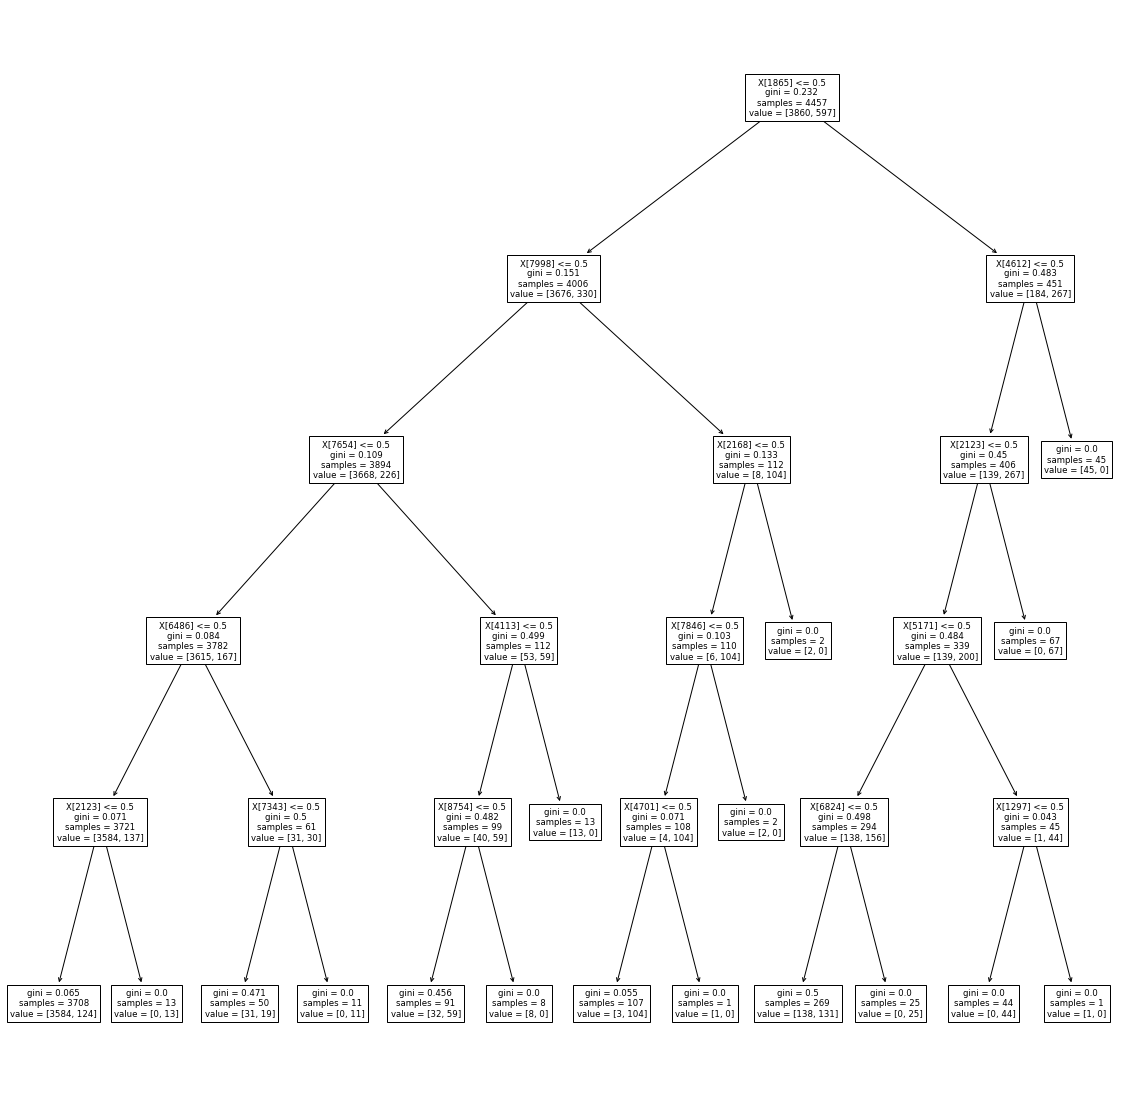

In [46]:
plt.figure(figsize = (20,20))
plot_tree(tree);

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(max_depth = 5)

In [31]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [32]:
(rf.predict(X_train) == y_train).mean()

1.0

In [33]:
rf.score(X_test, y_test)

0.9623318385650225

In [34]:
pd.Series(dict(zip(cv.get_feature_names(), rf.feature_importances_))).sort_values().tail(20)

18            0.007295
guaranteed    0.007957
new           0.007957
1000          0.008518
contact       0.008902
customer      0.009060
win           0.009213
500           0.009224
16            0.009688
urgent        0.010063
tone          0.011253
stop          0.011972
service       0.012964
text          0.015147
mobile        0.015649
prize         0.015791
claim         0.024610
free          0.027537
txt           0.030380
call          0.042341
dtype: float64

with a simple mvp run through, not really concerning myself with hyper parameters, a random forest performed 5% better than a simple random tree